<a href="https://colab.research.google.com/github/rubenguerra/hello_world/blob/master/ropa_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow y tf.keras
import tensorflow as tf
from tensorflow import keras

#Bibliotecas de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_name = ['Franela', 'Pantalón', 'Pullover', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatillas', 'Bolso', 'Botines']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [0]:
#plt.figure()
#plt.imshow(train_images(0))
#plt.colorbar()
#plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

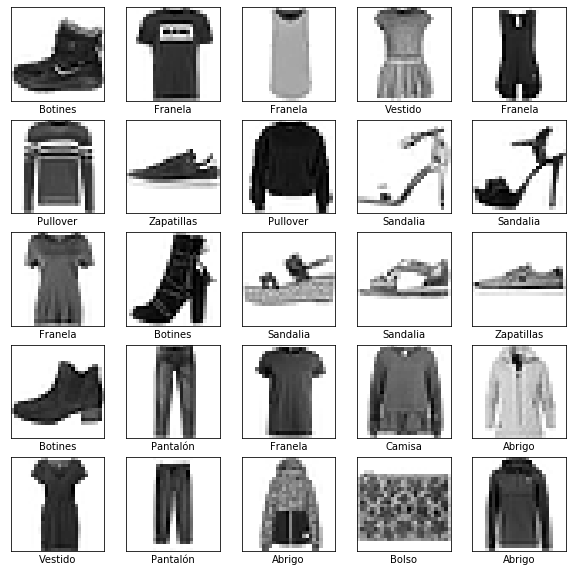

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])

SE CREA EL MODELO DE LA RED NEURONAL

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)    
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
##Compilando el modelO
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

A ENTRENAR EL MODELO

In [17]:
#Para entrenar el modelo
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4933 - acc: 0.8272
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3712 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3342 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3109 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2914 - acc: 0.8920


In [18]:
#Evaluamos la seguridad con que aprendió el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test de seguridad: ', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3393 - acc: 0.8782
Test de seguridad:  0.8782


In [0]:
#Aprendio con una cantidad de aciertos del 87%. Ahora se hacen predicciones
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([3.4559266e-06, 1.0240515e-06, 7.9643610e-07, 1.9744709e-07,
       8.4874341e-07, 3.3410045e-03, 4.4918611e-06, 6.9276094e-02,
       8.1796868e-05, 9.2729026e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

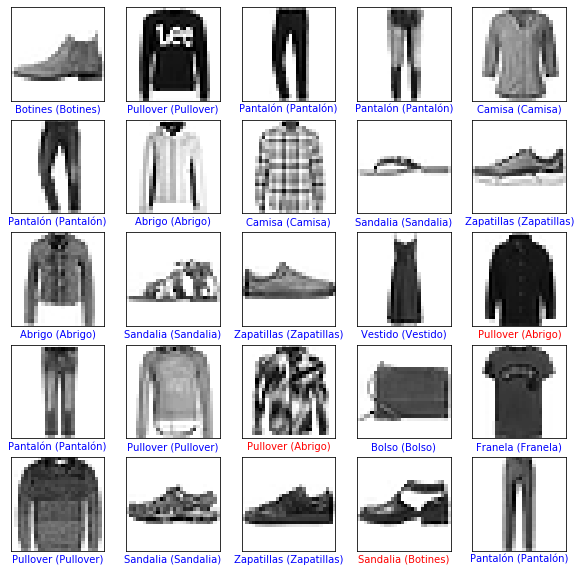

In [23]:
#Testear algunas imagenes. Las imagenes correctas estan en azul y las incorrectas en rojo
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions[i])
  true_label=test_labels[i]
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel('{} ({})'.format(class_name[predicted_label],
                            class_name[true_label]),
                            color=color)

In [24]:
#Usamos el modelo entrenado para hacer una prediccion sobre una imagen en específico
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
#tf.keras está optimizado para hacer predicciones en un lote de ejemplos de una vez
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
#La prediccion
predictions = model.predict(img)

print(predictions)

[[3.4559296e-06 1.0240503e-06 7.9643672e-07 1.9744706e-07 8.4874654e-07
  3.3410070e-03 4.4918693e-06 6.9276199e-02 8.1797014e-05 9.2729014e-01]]


In [27]:
prediction=predictions[0]

np.argmax(prediction)

9